In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob as gb
import cv2
import tensorflow as tf
import keras


In [2]:
filepath='../gender_detection/'
trainpath = f'{filepath}train/'
testpath = f'{filepath}test/'
predpath = f'{filepath}valid/'

In [3]:
for folder in os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 800 in folder man
For training data , found 800 in folder woman


In [4]:
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 170 in folder man
For testing data , found 170 in folder woman


In [5]:
for folder in  os.listdir(predpath) : 
    files = gb.glob(pathname= str(predpath+folder +'/*.jpg'))
    print(f'For Prediction data , found {len(files)} in folder {folder}')

For Prediction data , found 170 in folder man
For Prediction data , found 170 in folder woman


In [6]:
#الكود لمعرفة ال size 
size = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()    # بيجيب كل الshape المتساوية ويحسبهم مع بعض 

(125, 88, 3)     3
(154, 121, 3)    3
(123, 94, 3)     3
(86, 67, 3)      3
(134, 101, 3)    3
                ..
(469, 351, 3)    1
(143, 108, 3)    1
(197, 156, 3)    1
(351, 245, 3)    1
(66, 56, 3)      1
Length: 1502, dtype: int64

In [7]:
#الكود لمعرفة ال size 

size = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(170, 131, 3)      2
(147, 113, 3)      2
(209, 157, 3)      2
(225, 166, 3)      1
(1411, 1162, 3)    1
                  ..
(174, 115, 3)      1
(513, 416, 3)      1
(173, 131, 3)      1
(525, 471, 3)      1
(238, 161, 3)      1
Length: 337, dtype: int64

In [8]:
#الكود لمعرفة ال size 

size = []
for folder in  os.listdir(predpath ) : 
    files = gb.glob(pathname= str(predpath+folder +'/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(109, 84, 3)     2
(76, 55, 3)      2
(98, 74, 3)      2
(403, 277, 3)    1
(265, 190, 3)    1
                ..
(187, 150, 3)    1
(272, 225, 3)    1
(206, 145, 3)    1
(469, 351, 3)    1
(320, 213, 3)    1
Length: 337, dtype: int64

In [9]:
s=100


In [10]:
code = {'woman':0 ,'man':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [11]:
#read images 
#convert all to one size 
#read image using opencv --> cv2 


In [12]:
x_train = []
y_train = []
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath+ folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])

In [13]:
print(f'we have {len(x_train)} items in X_train')

we have 1600 items in X_train


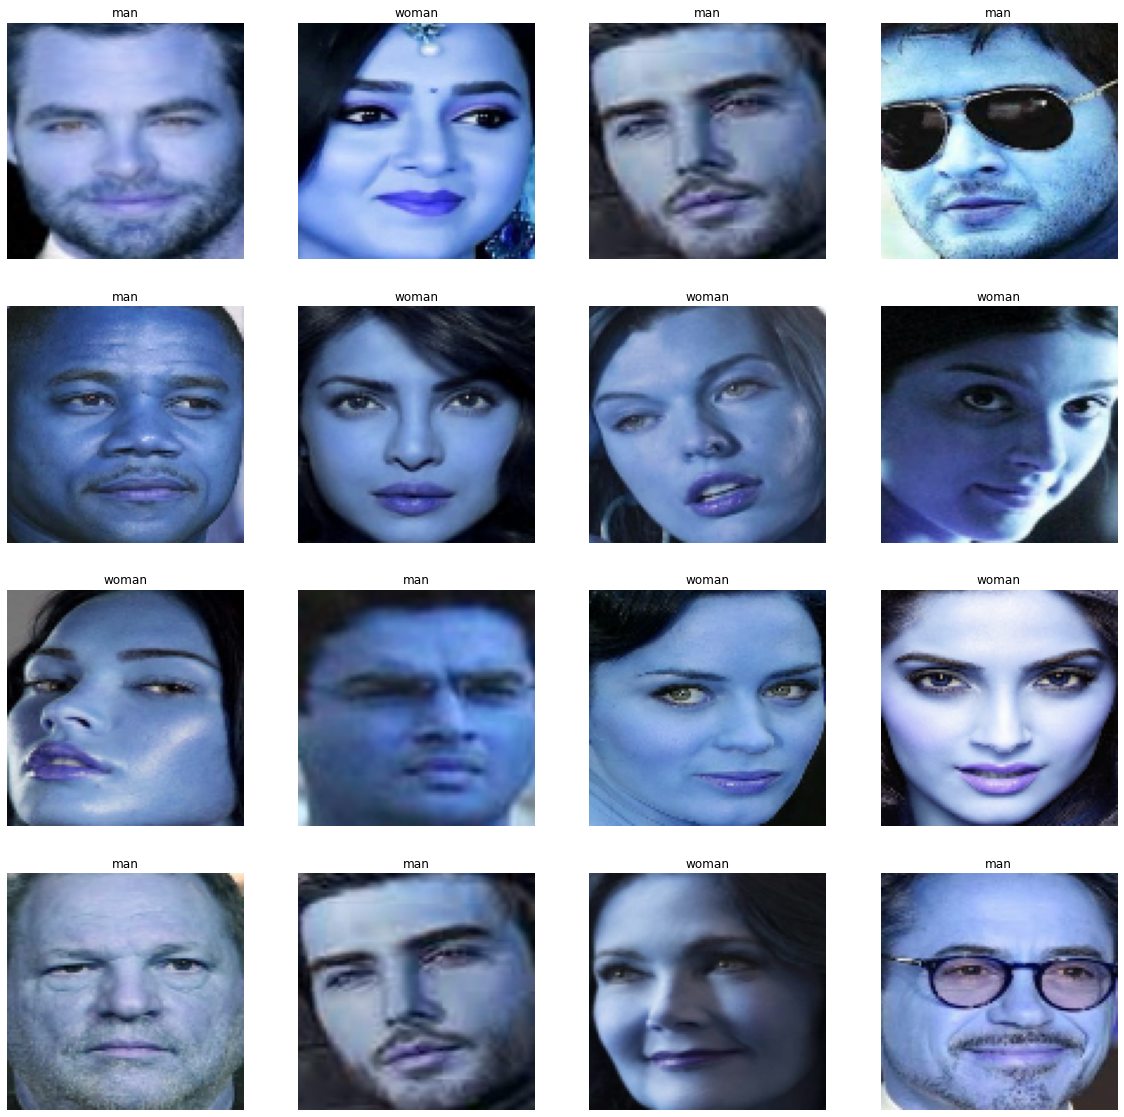

In [14]:
plt.figure(figsize=(20,20))
for n,i in enumerate(list(np.random.randint(0,len(x_train),16))):
    plt.subplot(4,4,n+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [15]:
x_test=[]
y_test=[]
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath+ folder + '/*.jpg'))
    for file in files:
        image=cv2.imread(file)
        image_array=cv2.resize(image,(s,s))
        x_test.append(list(image_array))
        y_test.append(code[folder])

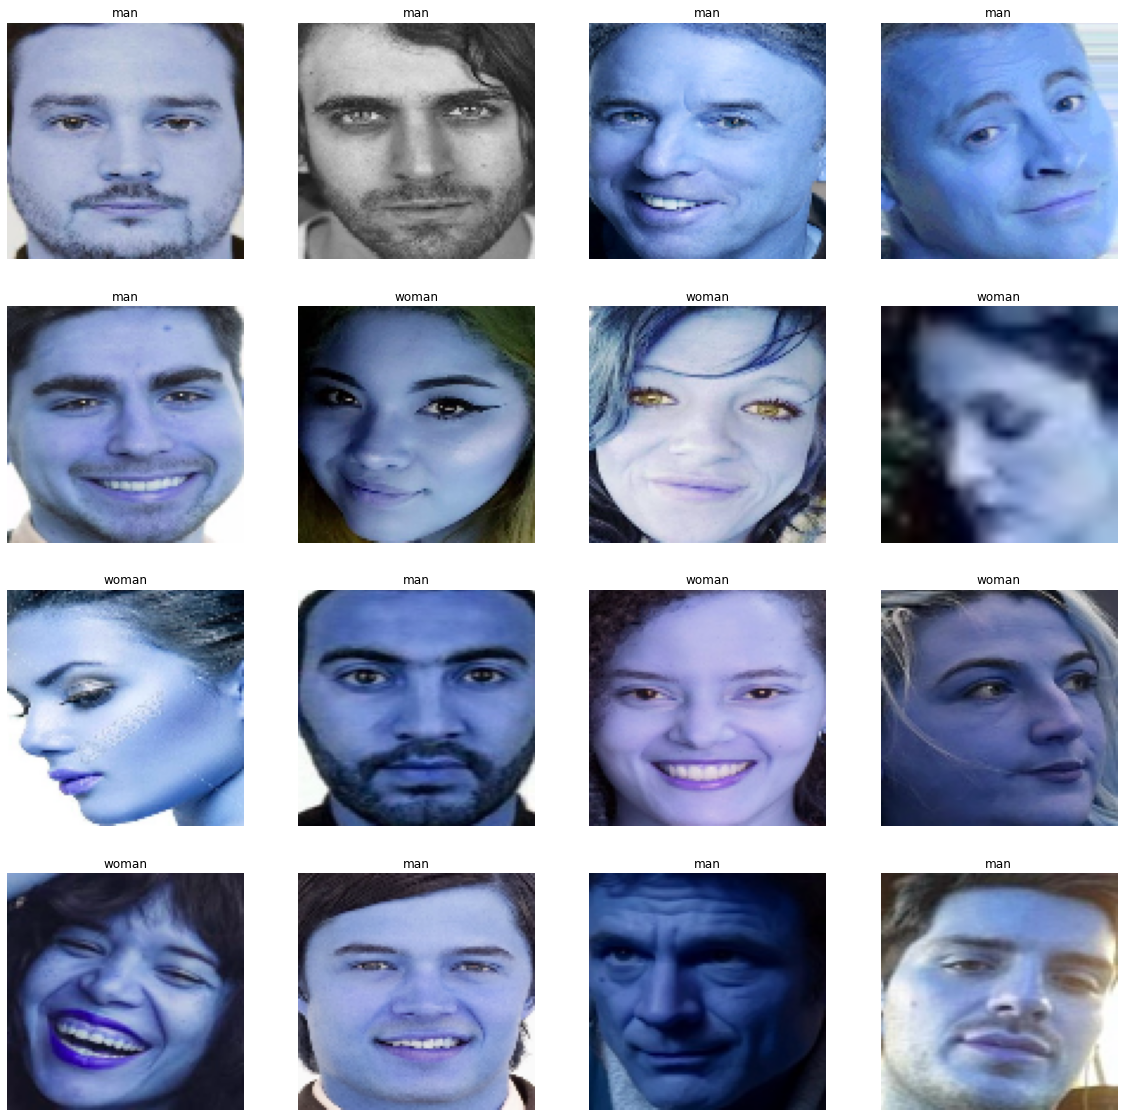

In [16]:
plt.figure(figsize=(20,20))
for n,i in enumerate(list(np.random.randint(0,len(x_test),16))):
    plt.subplot(4,4,n+1)
    plt.imshow(x_test[i])
    plt.title(getcode(y_test[i]))
    plt.axis('off')

In [17]:
x_pred = []
for folder in  os.listdir(predpath ) : 
    files = gb.glob(pathname= str(predpath + folder+ '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_pred.append(list(image_array))   

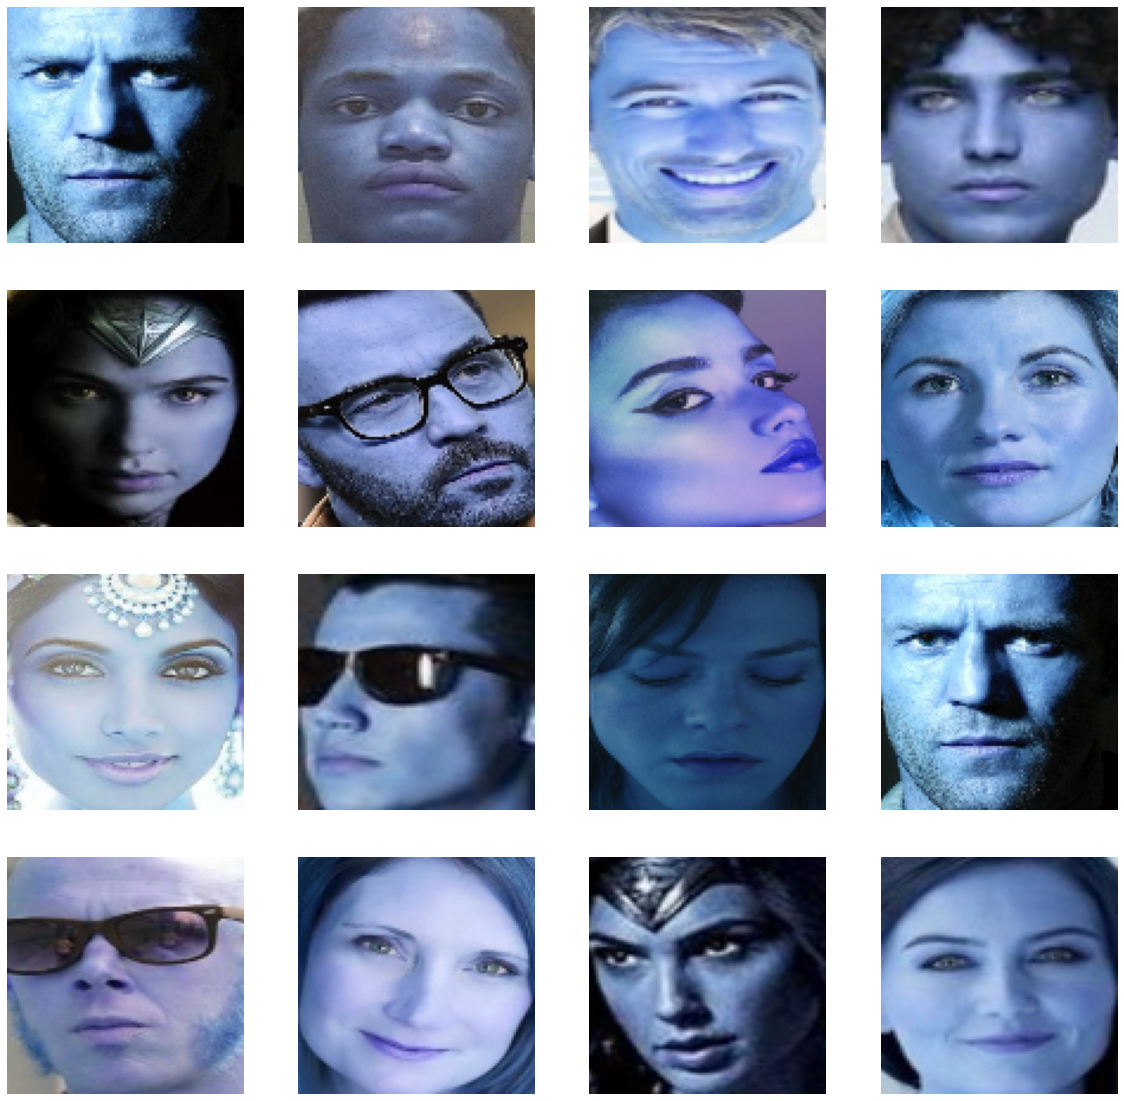

In [18]:
plt.figure(figsize=(20,20))
for n,i in enumerate(list(np.random.randint(0,len(x_pred),16))):
    plt.subplot(4,4,n+1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    

In [19]:
x_train=np.array(x_train)
x_test=np.array(x_test)
x_pred_array=np.array(x_pred)
y_train=np.array(y_train)
y_test=np.array(y_test)
print(f'x_train shape is {x_train.shape}')
print(f'x_test shape is {x_test.shape}')
print(f'x_pred shape is {x_pred_array.shape}')
print(f'y train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

x_train shape is (1600, 100, 100, 3)
x_test shape is (340, 100, 100, 3)
x_pred shape is (340, 100, 100, 3)
y train shape is (1600,)
y_test shape is (340,)


In [20]:
# build model 

model=keras.models.Sequential([
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.MaxPool2D(2,2),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten(),   
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.25) ,            
        keras.layers.Dense(6,activation='softmax') ,  
        ])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 150)       4200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 150)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 80)        108080    
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 50)        36050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 50)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24200)             0

In [22]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
epochs = 12
ThisModel = model.fit(x_train, y_train, epochs=epochs,batch_size=32,verbose=1)

Epoch 1/12
50/50 [==============================] - 64s 1s/step - loss: 5.5674 - accuracy: 0.5813
Epoch 2/12
50/50 [==============================] - 62s 1s/step - loss: 0.5986 - accuracy: 0.7719
Epoch 3/12
50/50 [==============================] - 62s 1s/step - loss: 0.4139 - accuracy: 0.8263
Epoch 4/12
50/50 [==============================] - 62s 1s/step - loss: 0.3094 - accuracy: 0.8794
Epoch 5/12
50/50 [==============================] - 62s 1s/step - loss: 0.2528 - accuracy: 0.9013
Epoch 6/12
50/50 [==============================] - 62s 1s/step - loss: 0.1736 - accuracy: 0.9256
Epoch 7/12
50/50 [==============================] - 62s 1s/step - loss: 0.1600 - accuracy: 0.9431
Epoch 8/12
50/50 [==============================] - 61s 1s/step - loss: 0.1371 - accuracy: 0.9519
Epoch 9/12
50/50 [==============================] - 63s 1s/step - loss: 0.1118 - accuracy: 0.9619
Epoch 10/12
50/50 [==============================] - 61s 1s/step - loss: 0.1694 - accuracy: 0.9488
Epoch 11/12
50/50 [

In [24]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(f'Test Loss is {val_loss}')
print(f'Test Accuracy is {val_acc}')

11/11 [==============================] - 4s 327ms/step - loss: 0.6637 - accuracy: 0.8500
Test Loss is 0.6637381315231323
Test Accuracy is 0.8500000238418579


In [25]:
model.evaluate(x_train,y_train)

50/50 [==============================] - 18s 345ms/step - loss: 0.0119 - accuracy: 0.9969


[0.011883441358804703, 0.996874988079071]

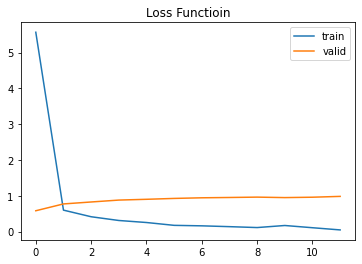

In [26]:
plt.plot(ThisModel.history['loss'], label = 'train')
plt.plot(ThisModel.history['accuracy'], label = 'valid')
plt.legend()
plt.title('Loss Functioin')
plt.grid(False)


In [27]:
y_result = model.predict(x_pred_array)

print(f'Prediction Shape is {y_result.shape}')

Prediction Shape is (340, 6)


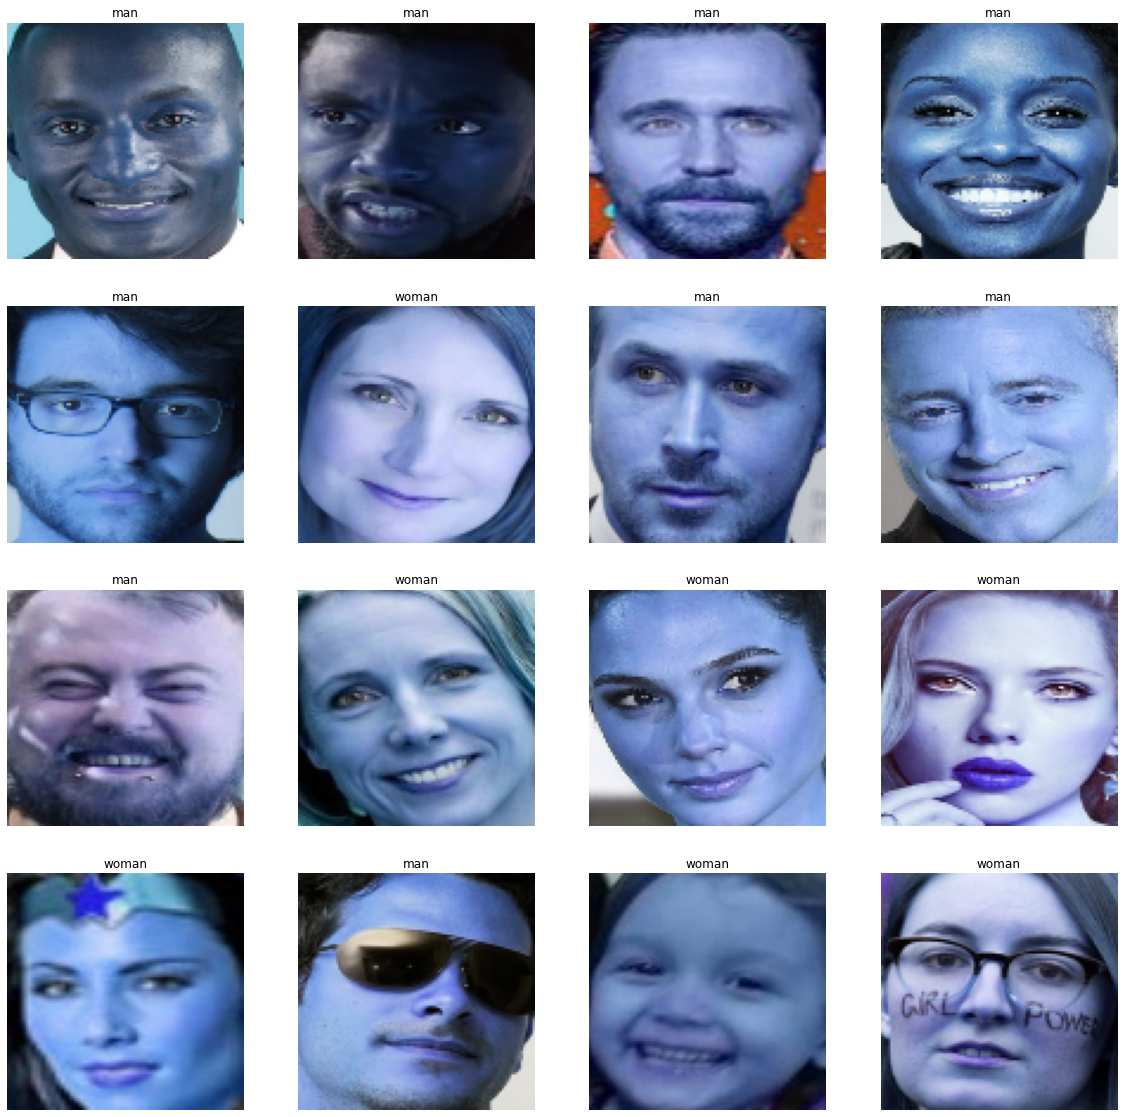

In [28]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(x_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

Text(0.5, 1.0, 'man')

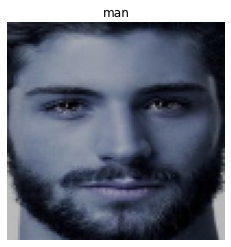

In [29]:
i=np.random.randint(0,len(x_pred))
plt.imshow(x_pred[i])    
plt.axis('off')
plt.title(getcode(np.argmax(y_result[i])))

In [30]:
model.save('gender.model3')

INFO:tensorflow:Assets written to: gender.model3\assets
